In [1]:
import pandas as pd
import pickle
import scikeras
from functions import encodingSplitting, fullRead, scaling

with open ("resultsModelsMLP.pkl", 'rb') as f:
        resultsModelsMLP = pickle.load(f)


C:\Users\Diego\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Diego\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Diego\AppData\Local\Temp\ipykernel_4720\2012696804.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pan

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.1 when using version 1.0.2. This might lead to breaking code or inval

In [13]:
paths = ["plasmFlav_ord.csv", "plasmAnt_ord.csv", "urineFlav_ord.csv", "urineAnt_ord.csv"]
paths = ["data/" + s for s in paths]

'''
resultsModelsRF = {}
resultsScoresRF = {}
for path in paths:
    df, df_name = fullRead(path, sep = ",", anthro = True)
    
    #resultsModelsRF["modelRFMet{0}".format(df_name)], resultsScoresRF["modelRFMet{0}".format(df_name)] = randomForestReg(scaling(df), df_name, met = True)
    #resultsModelsRF["modelRFFull{0}".format(df_name)], resultsScoresRF["modelRFFull{0}".format(df_name)] = randomForestReg(scaling(df), df_name, met = False)
'''

df, df_name = fullRead("data/plasmFlav_ord.csv", sep = ",", anthro = True)

X_met, y_met, X_metTrain, X_metTest, y_metTrain, y_metTest, X_full, y_full, X_fullTrain, X_fullTest, y_fullTrain, y_fullTest = encodingSplitting(df)

c:\Users\Diego\Documents\repositories\thirdArt\functions.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_renamed.fillna(0, inplace=True)


In [34]:
dummies_sweetener = pd.from_dummies(X_metTest[['Sweetener_SA', 'Sweetener_ST','Sweetener_SU']]).replace("Sweetener_", "",regex=True).set_index(X_metTest.index-1)
dummies_sex = pd.from_dummies(X_metTest[['Sex_MAN', "Sex_WOMAN"]]).replace("Sex_", "",regex=True).set_index(X_metTest.index-1)

pred_prueba = resultsModelsMLP["modelMLPMetplasmFlav"].predict(X_metTest)
pred_prueba_DF = pd.DataFrame(pred_prueba, index = X_metTest.index-1, columns=y_metTest.columns).add_suffix("_pred").join(y_metTest.add_suffix('_test'))
pred_prueba_DF["Sex"] = dummies_sex
pred_prueba_DF["Sweetener"] = dummies_sweetener

<AxesSubplot:xlabel='E_pred', ylabel='E_test'>

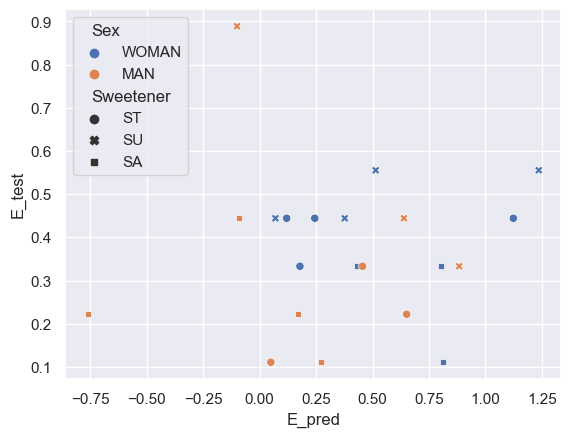

In [39]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data = pred_prueba_DF, x = "E_pred", y = "E_test", hue= "Sex", style = "Sweetener")


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<AxesSubplot:xlabel='E_pred', ylabel='E_test'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


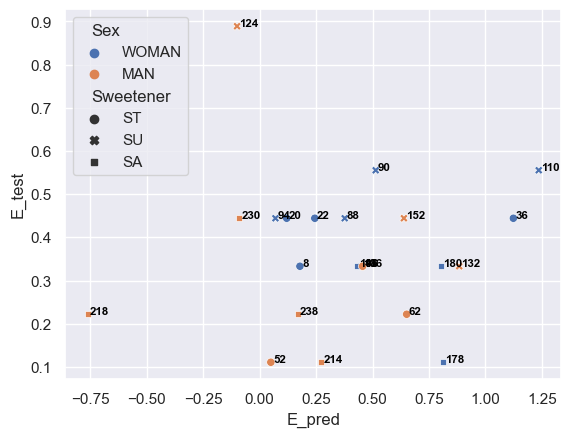

In [99]:
import matplotlib.pyplot as plt

def scatter_text(x, y, text_column, data):
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, hue = "Sex", style="Sweetener", )
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][text_column[line]]+0.01, data[y][text_column[line]], 
                 text_column[line], horizontalalignment='left', 
                 size='x-small', color='black', weight='semibold')
    plt.savefig("output_prueba.png")
    return p1

scatter_text(x="E_pred", y = "E_test", text_column=pred_prueba_DF.index, data=pred_prueba_DF)